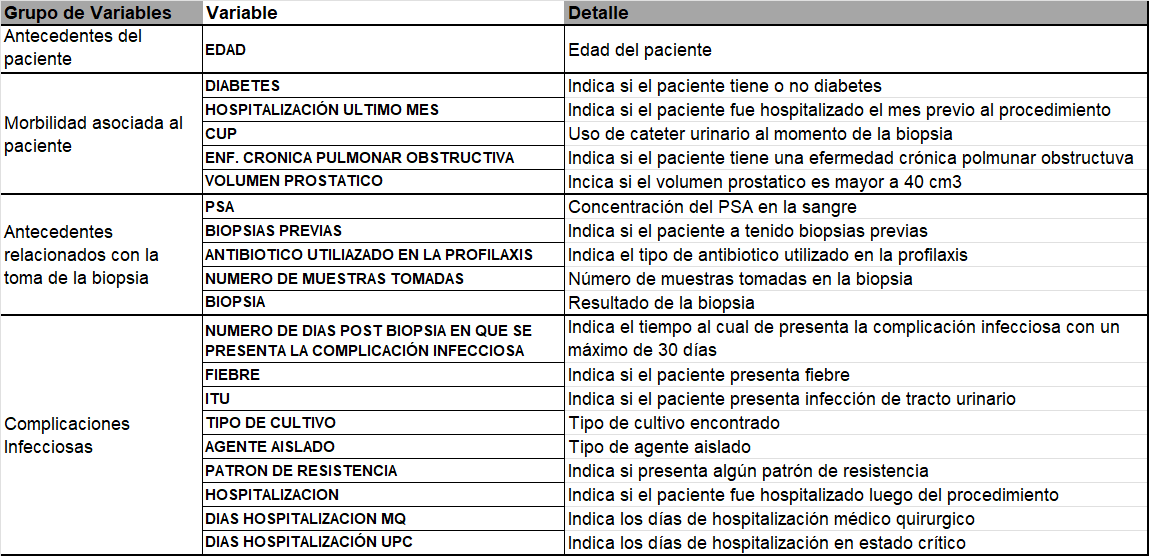

In [ ]:
# importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# cargar datos
df = pd.read_csv('/content/BBDD_Hospitalización.csv', sep=';', encoding='latin_1', decimal=',')

In [ ]:
#  EDA
df.sample(5)

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
506,59.0,NO,NO,8.3,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
194,71.0,NO,NO,18.2,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
198,53.0,NO,NO,9.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
245,58.0,NO,NO,7.0,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
40,53.0,NO,NO,100.0,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NO,SI,ADENOCARCINOMA GLEASON 9,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [ ]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [ ]:
# renombrar columnas
df.rename({'EDAD': 'Edad', 'DIABETES': 'Diabetes', 'HOSPITALIZACIÓN ULTIMO MES': 'HHUltimoMes',	'PSA': 'PSA',	'BIOPSIAS PREVIAS': 'BiopsiasPrevias', 'VOLUMEN PROSTATICO': 'VolumenProstatico',	'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'AntibioticoProfilaxis', 'NUMERO DE MUESTRAS TOMADAS': 'CantidadMuestras', 'CUP': 'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'EnfermedadCPO', 'BIOPSIA': 'Biopsia',	'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'InicioComplicacion', 'FIEBRE': 'Fiebre', 'ITU': 'ITU', 'TIPO DE CULTIVO': 'TipoCultivo', 'AGENTE AISLADO': 'AgenteAislado', 'PATRON DE RESISTENCIA': 'PatronResistencia', 'HOSPITALIZACION': 'Hospitalizacion', 'DIAS HOSPITALIZACION MQ': 'DiasHH_MQ', 'DIAS HOSPITALIZACIÓN UPC': 'DiasHH_UPC'}, axis=1, inplace=True)

In [ ]:
# reubicar columnas
df = df[['Edad', 'Diabetes', 'HHUltimoMes', 'CUP', 'EnfermedadCPO', 'VolumenProstatico', 'PSA', 'BiopsiasPrevias', 'AntibioticoProfilaxis', 'CantidadMuestras', 'Biopsia', 'InicioComplicacion', 'Fiebre', 'ITU', 'TipoCultivo', 'AgenteAislado', 'PatronResistencia', 'Hospitalizacion', 'DiasHH_MQ', 'DiasHH_UPC']]

In [ ]:
# validar cambios
df.sample(5)

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
406,66.0,NO,NO,NO,NO,SI,11.5,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
60,47.0,NO,NO,NO,NO,NO,6.0,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
463,73.0,SI,NO,NO,NO,SI,28.0,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
403,59.0,NO,NO,NO,NO,NO,9.4,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,10.0,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
35,75.0,SI,NO,NO,SI,SI,5.1,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,ADENOCARCINOMA GLEASON 6,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   568 non-null    float64
 1   Diabetes               568 non-null    object 
 2   HHUltimoMes            568 non-null    object 
 3   CUP                    568 non-null    object 
 4   EnfermedadCPO          566 non-null    object 
 5   VolumenProstatico      567 non-null    object 
 6   PSA                    564 non-null    float64
 7   BiopsiasPrevias        566 non-null    object 
 8   AntibioticoProfilaxis  568 non-null    object 
 9   CantidadMuestras       568 non-null    float64
 10  Biopsia                568 non-null    object 
 11  InicioComplicacion     568 non-null    object 
 12  Fiebre                 568 non-null    object 
 13  ITU                    568 non-null    object 
 14  TipoCultivo            568 non-null    object 
 15  Agente

In [ ]:
df2 = df.copy()

# Valores Nulos

In [ ]:
# contar cantidad de nulos por cada variable
df2.isna().sum()

Edad                      2
Diabetes                  2
HHUltimoMes               2
CUP                       2
EnfermedadCPO             4
VolumenProstatico         3
PSA                       6
BiopsiasPrevias           4
AntibioticoProfilaxis     2
CantidadMuestras          2
Biopsia                   2
InicioComplicacion        2
Fiebre                    2
ITU                       2
TipoCultivo               2
AgenteAislado            19
PatronResistencia         2
Hospitalizacion           5
DiasHH_MQ                 2
DiasHH_UPC                2
dtype: int64

In [ ]:
# eliminar registros que con todos sus valores nulos
df2.dropna(axis=0, how='all', inplace=True)
df2.reset_index(drop=True, inplace=True) # reset index

In [ ]:
# <Edad>
# validar valores nulos
df2[df2['Edad'].isna()].index

Int64Index([568], dtype='int64')

In [ ]:
# verificar registro 568
df2.loc[[568]]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
568,NaN,NaN,NaN,#N/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Se elimina el registro 568 debido a que posee todos los valores nulos

In [ ]:
# eliminar registro
df2.drop(df2[df2['Edad'].isna()].index, axis=0, inplace=True)
df2.reset_index(drop=True, inplace=True) # reset index

In [ ]:
# <PSA>
# validar valores nulos
df2[df2['PSA'].isna()].index

Int64Index([9, 76, 103, 121], dtype='int64')

In [ ]:
# verificar registros
df2.loc[[9, 76, 103, 121]]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
9,44.0,NO,NO,NO,NO,NO,NaN,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
76,57.0,NO,NO,NO,NO,NO,NaN,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
103,60.0,NO,NO,NO,NO,SI,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
121,62.0,NO,NO,NO,NO,SI,NaN,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,6.0,ADENOCARCINOMA GLEASON 8,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


Los valores normales del antígeno de la próstata (PSA) se expresan en ng/ml y dependen de la edad:<br>
Hombres mayores de 70 años: < 6.5 ng/ml<br>
Hombres entre 60 y 69 años: < 4.5 ng/ml<br>
Hombres entre 50 y 59 años: < 3.5 ng/ml<br>
Hombres entre 40 y 49 años: < 2.5 ng/ml<br>
<br>
Se decide inputar los valores nulos con valores maximos de referencia deacuerdo a la edad.

In [ ]:
# inputar valores nulos con valores maximos de referencia deacuerdo a la edad
for i in df2[df2['PSA'].isna()].index:
  if df2.loc[i, 'Edad'] < 50:
    df2.loc[[i], 'PSA'] = 2.5
  elif df2.loc[i, 'Edad'] in range(50, 60):
    df2.loc[[i], 'PSA'] = 3.5
  elif df2.loc[i, 'Edad'] in range(60, 70):
    df2.loc[[i], 'PSA'] = 4.5
  else: # mayor a 70
    df2.loc[[i], 'PSA'] =6.5

In [ ]:
# validar cambios
df2.isna().sum()

Edad                      0
Diabetes                  0
HHUltimoMes               0
CUP                       1
EnfermedadCPO             2
VolumenProstatico         1
PSA                       0
BiopsiasPrevias           2
AntibioticoProfilaxis     0
CantidadMuestras          0
Biopsia                   0
InicioComplicacion        0
Fiebre                    0
ITU                       0
TipoCultivo               0
AgenteAislado            17
PatronResistencia         0
Hospitalizacion           3
DiasHH_MQ                 0
DiasHH_UPC                0
dtype: int64

In [ ]:
# <CUP> <VolumenProstatico>
# validar valores nulos
df2.loc[df2[df2['CUP'].isna()].index]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
565,69.0,NO,NO,NaN,NO,NaN,4.43,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


Se decide eliminar el registro debido a que es nulo tanto para 'CUP' como  para 'VolumenProstatico'

In [ ]:
# eliminar registro 
df2.drop(df2[df2['CUP'].isna()].index, axis=0, inplace=True) 
df2.reset_index(drop=True, inplace=True) # reset index

In [ ]:
# <EnfermedadCPO>
# validar valores nulos
df2.loc[df2[df2['EnfermedadCPO'].isna()].index]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
565,67.0,NO,NO,NO,NaN,SI,8.0,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
566,59.0,NO,NO,NO,NaN,SI,9.0,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


Se decide eliminar los registros al verificar que el sujeto no tuvo complicacion con el procedimiento, objetivo del cual es el estudio actual



In [ ]:
# eliminar registros
df2.drop(df2[df2['EnfermedadCPO'].isna()].index, axis=0, inplace=True) 
df2.reset_index(drop=True, inplace=True) # reset index

In [ ]:
# <BiopsiasPrevias>
# validar valores nulos
df2.loc[df2[df2['BiopsiasPrevias'].isna()].index]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
92,58.0,NO,NO,NO,NO,SI,7.8,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0


Se decide eliminar el registro al verificar que el sujeto no tuvo complicacion con el procedimiento, objetivo del cual es el estudio actual

In [ ]:
# eliminar registro
df2.drop(df2[df2['BiopsiasPrevias'].isna()].index, axis=0, inplace=True) 
df2.reset_index(drop=True, inplace=True) # reset index

In [ ]:
# <AgenteAislado>
# validar valores nulos
df2.loc[df2[df2['AgenteAislado'].isna()].index]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
26,75.0,NO,NO,NO,"SI, EPOC",SI,25.00,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
98,70.0,NO,NO,NO,NO,SI,7.20,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
105,65.0,NO,NO,NO,NO,SI,5.97,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
114,56.0,NO,NO,NO,NO,SI,4.00,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
115,55.0,NO,NO,NO,NO,SI,17.00,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
125,74.0,NO,NO,NO,NO,SI,8.00,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
127,69.0,NO,NO,NO,NO,SI,13.40,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
128,63.0,NO,NO,NO,NO,SI,11.00,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
129,63.0,NO,NO,NO,NO,SI,21.30,SI,OTROS,24.0,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
137,64.0,NO,NO,NO,NO,SI,15.60,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12.0,NEG,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0


In [ ]:
# inputar registros con atributo 'Sin Dato'
df2['AgenteAislado'].fillna(value='Sin Dato', inplace=True)

In [ ]:
# <Hospitalizacion>
# validar valores nulos
df2.loc[df2[df2['Hospitalizacion'].isna()].index]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
31,63.0,NO,NO,NO,"SI, ASMA",NO,10.8,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
99,74.0,NO,NO,NO,NO,NO,5.8,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
108,61.0,NO,NO,NO,NO,NO,7.0,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0


Se decide inputar los valores nulos con el atributo 'NO', debido a que se observa que NO aparece registro del paciente con dias de hospitalizacion en los 
atributos 'DiasHH_MQ', 'DiasHH_UPC'

In [ ]:
# imoutar valores nulos con con atributo'NO'
df2.loc[df2[df2['Hospitalizacion'].isna()].index, 'Hospitalizacion'] = 'NO'


In [ ]:
# validar cambios
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   564 non-null    float64
 1   Diabetes               564 non-null    object 
 2   HHUltimoMes            564 non-null    object 
 3   CUP                    564 non-null    object 
 4   EnfermedadCPO          564 non-null    object 
 5   VolumenProstatico      564 non-null    object 
 6   PSA                    564 non-null    float64
 7   BiopsiasPrevias        564 non-null    object 
 8   AntibioticoProfilaxis  564 non-null    object 
 9   CantidadMuestras       564 non-null    float64
 10  Biopsia                564 non-null    object 
 11  InicioComplicacion     564 non-null    object 
 12  Fiebre                 564 non-null    object 
 13  ITU                    564 non-null    object 
 14  TipoCultivo            564 non-null    object 
 15  Agente

In [ ]:
# cambiar 'NO' por 0, para manejar valores numericos
df2.loc[df2[df2['InicioComplicacion'] == 'NO'].index, 'InicioComplicacion'] = 0

In [ ]:
# validar cambios
df2['InicioComplicacion'].value_counts()

0    538
2      9
3      8
1      5
5      2
9      2
Name: InicioComplicacion, dtype: int64

In [ ]:
# cambiar tipo de datos
df2.Edad = df2.Edad.astype('int64')
df2.PSA = df2.PSA.astype('float64')
df2.CantidadMuestras = df2.CantidadMuestras.astype('int64')
df2.InicioComplicacion = df2.InicioComplicacion.astype('int64')
df2.DiasHH_MQ = df2.DiasHH_MQ.astype('int64')
df2.DiasHH_UPC = df2.DiasHH_UPC.astype('int64')

In [ ]:
# validar cambios
df2.sample(5)

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
204,73,NO,NO,NO,NO,SI,16.0,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NEG,0,NO,NO,NO,NO,NO,NO,0,0
158,42,NO,NO,NO,NO,NO,6.0,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12,NEG,0,NO,NO,NO,NO,NO,NO,0,0
521,69,NO,NO,NO,NO,NO,5.0,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,ADENOCARCINOMA GLEASON 8,0,NO,NO,NO,NO,NO,NO,0,0
462,73,SI,NO,NO,NO,SI,28.0,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NEG,0,NO,NO,NO,NO,NO,NO,0,0
433,66,SI,NO,NO,NO,SI,8.0,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12,ADENOCARCINOMA GLEASON 7,0,NO,NO,NO,NO,NO,NO,0,0


In [ ]:
# validar cambios
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Edad                   564 non-null    int64  
 1   Diabetes               564 non-null    object 
 2   HHUltimoMes            564 non-null    object 
 3   CUP                    564 non-null    object 
 4   EnfermedadCPO          564 non-null    object 
 5   VolumenProstatico      564 non-null    object 
 6   PSA                    564 non-null    float64
 7   BiopsiasPrevias        564 non-null    object 
 8   AntibioticoProfilaxis  564 non-null    object 
 9   CantidadMuestras       564 non-null    int64  
 10  Biopsia                564 non-null    object 
 11  InicioComplicacion     564 non-null    int64  
 12  Fiebre                 564 non-null    object 
 13  ITU                    564 non-null    object 
 14  TipoCultivo            564 non-null    object 
 15  Agente

# Valores Atipicos

In [ ]:
# validar 
df2.describe()

,Edad,PSA,CantidadMuestras,InicioComplicacion,DiasHH_MQ,DiasHH_UPC
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,63.886525,13.246170,12.989362,0.132979,0.166667,0.014184
std,9.305429,15.680914,3.923318,0.748031,0.961361,0.197167
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000,0.000000
max,151.000000,100.000000,24.000000,9.000000,12.000000,3.000000


In [ ]:
#df2[df2['Edad']<0].sort_values(by='Edad')

In [ ]:
# <Edad>
# detectar valores atipicos usando metodo 3 sigmas
df2[df2['Edad'] > df2['Edad'].mean() + 3 * df2['Edad'].std()]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
160,143,SI,NO,NO,NO,NO,6.8,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NEG,0,NO,NO,NO,NO,NO,NO,0,0
180,151,NO,NO,NO,NO,SI,5.7,NO,OTROS,12,NEG,0,NO,NO,NO,NO,NO,NO,0,0


In [ ]:
# imoutar valores atipicos con el promedio de la edad
df2.loc[df2[df2['Edad'] > df2['Edad'].mean() + 3 * df2['Edad'].std()].index, 'Edad'] = df2['Edad'].mean().astype(int)

In [ ]:
# detectar valores atipicos usando metodo 3 sigmas
df2[df2['Edad'] < df2['Edad'].mean() - 3 * df2['Edad'].std()]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
223,39,NO,NO,NO,NO,NO,3.6,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12,NEG,0,NO,NO,NO,NO,NO,NO,0,0
480,39,NO,NO,NO,NO,NO,3.9,NO,CEFALOSPORINA_AMINOGLUCOCIDO,12,NEG,0,NO,NO,NO,NO,NO,NO,0,0


Se decide conservar los valores detectados atipicos rango menor, debido a que no se considera pertinente descartar a los 2 pacientes con edad de 39 años  

In [ ]:
# <PSA>
# detectar valores atipicos usando metodo 3 sigmas
df2[df2['PSA'] > df2['PSA'].mean() + 3 * df2['PSA'].std()]

A pesar de encontrar valores atipicos para la variable 'PSA'. Se realizo una rapida consulta bibliografica respecto al estudio en cuestion identificando que los valores que podriamos considerar atipicos estan dentro de los casos exepcionales posibles del estudio y es pertiente conservarlos

In [ ]:
# <CantidadMuestras>
# detectar valores atipicos usando metodo 3 sigmas
df2[df2['CantidadMuestras'] > df2['CantidadMuestras'].mean() + 3 * df2['CantidadMuestras'].std()]

In [ ]:
# <InicioComplicacion>
# detectar valores atipicos usando metodo 3 sigmas
df2[df2['InicioComplicacion'] > df2['InicioComplicacion'].mean() + 3 * df2['InicioComplicacion'].std()]

,Edad,Diabetes,HHUltimoMes,CUP,EnfermedadCPO,VolumenProstatico,PSA,BiopsiasPrevias,AntibioticoProfilaxis,CantidadMuestras,Biopsia,InicioComplicacion,Fiebre,ITU,TipoCultivo,AgenteAislado,PatronResistencia,Hospitalizacion,DiasHH_MQ,DiasHH_UPC
14,65,NO,NO,NO,NO,NO,4.30,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NEG,3,SI,NO,NO,NO,NO,SI,2,0
15,62,NO,NO,NO,NO,SI,7.00,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NEG,3,SI,NO,NO,NO,NO,SI,4,0
16,65,SI,NO,NO,NO,SI,5.19,NO,CEFALOSPORINA_AMINOGLUCOCIDO,24,NEG,3,SI,NO,NO,NO,NO,SI,2,0
17,71,NO,NO,NO,NO,SI,4.50,NO,OROQUINOLONAS,12,ADENOCARCINOMA GLEASON 6,3,SI,NO,NO,NO,NO,SI,2,0
18,65,NO,NO,NO,NO,NO,4.50,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NEG,3,SI,NO,NO,NO,NO,SI,2,0
19,62,SI,NO,NO,NO,SI,7.00,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NEG,3,SI,NO,NO,NO,NO,SI,4,0
20,64,SI,NO,NO,NO,SI,5.70,NO,CEFALOSPORINA_AMINOGLUCOCIDO,24,NEG,3,NO,NO,NO,NO,NO,SI,2,0
21,71,NO,NO,NO,NO,SI,4.30,NO,OROQUINOLONAS,12,ADENOCARCINOMA GLEASON 6,3,SI,NO,NO,NO,NO,SI,2,2
22,69,SI,NO,NO,NO,SI,14.00,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18,ADENOCARCINOMA GLEASON 7,5,SI,SI,UROCULTIVO,PSEUDOMONAS AERUGINOSA,MULTI SENSIBLE,SI,12,0
23,69,NO,NO,NO,NO,SI,14.00,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18,ADENOCARCINOMA GLEASON 7,5,SI,SI,UROCULTIVO,PSEUDOMONAS AERUGINOSA,MULTI SENSIBLE,SI,12,0


A pesar de detectar valores atipicos para la variable 'InicioComplicacion'. Se observa que la mayoria de pacientes en el estudio no presenta complicacion por lo tanto se ven afectados los valores de media, mediana, std ... el rango de valores de la variable es considerado normal y se decide conservar dichos valores

In [ ]:
# <DiasHH_MQ>
# detectar valores atipicos usando metodo 3 sigmas
df2[df2['DiasHH_MQ'] > df2['DiasHH_MQ'].mean() + 3 * df2['DiasHH_MQ'].std()]

In [ ]:
# <DiasHH_UPC>
# detectar valores atipicos usando metodo 3 sigmas
df2[df2['DiasHH_UPC'] > df2['DiasHH_UPC'].mean() + 3 * df2['DiasHH_UPC'].std()]

A pesar de detectar valores atipicos tanto para la variable 'DiasHH_MQ' como para 'DiasHH_UPC' se decide conservar dichos valores, al considerar que la cantidad de pacientes hospitalizados en el estudio es demasiado bajo respecto a los que no fueron hospitalizados y el rango en el que oscilan las variables es menor a 12 y 3 dias respectivamente

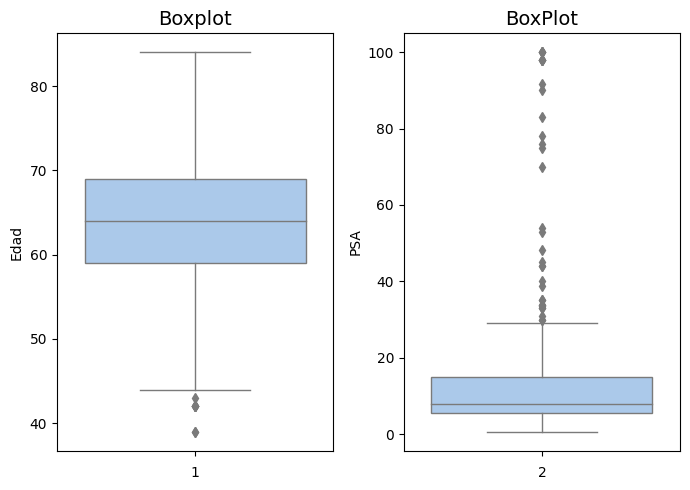

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(7,5))

sns.boxplot(data=df2, y='Edad', linewidth=1, palette='pastel', ax=axes[0])
axes[0].set_title('Boxplot', fontsize=14)
axes[0].set_xlabel('1', fontsize=10)
axes[0].set_ylabel('Edad', fontsize=10)

sns.boxplot(data=df2, y='PSA', linewidth=1, palette='pastel', ax=axes[1])
axes[1].set_title('BoxPlot', fontsize=14)
axes[1].set_xlabel('2', fontsize=10)
axes[1].set_ylabel('PSA', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

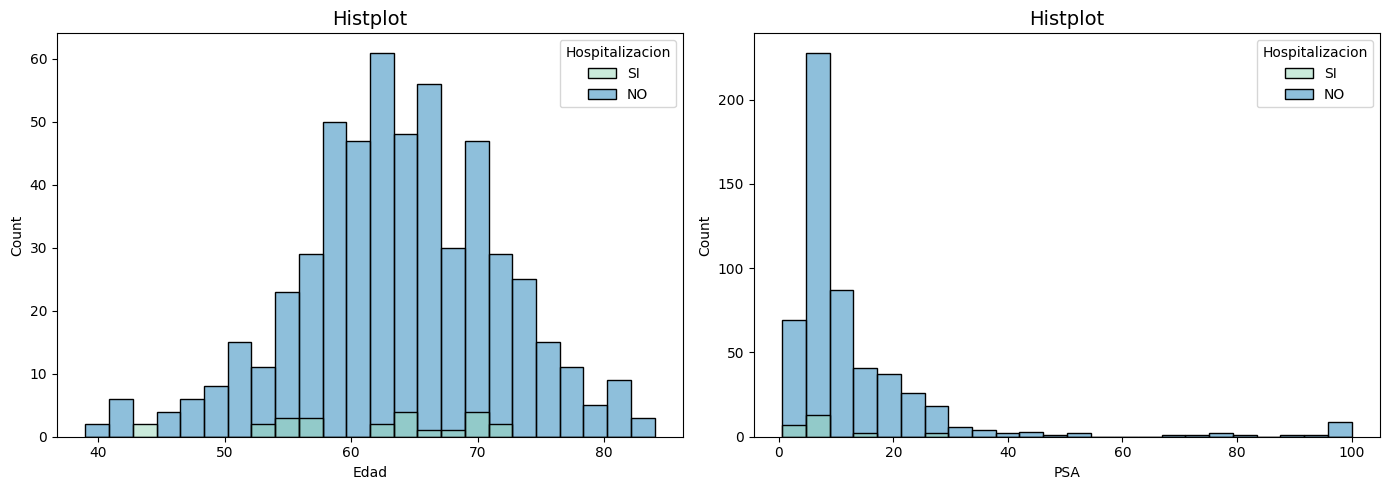

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

sns.histplot(data=df2, x='Edad', hue='Hospitalizacion', bins=24, stat='count', palette='YlGnBu', ax=axes[0])
axes[0].set_title('Histplot', fontsize=14)

sns.histplot(data=df2, x='PSA', hue='Hospitalizacion', bins=24, stat='count', palette='YlGnBu', ax=axes[1])
axes[1].set_title('Histplot', fontsize=14)

#ajustar espacio entre subplots
plt.tight_layout()

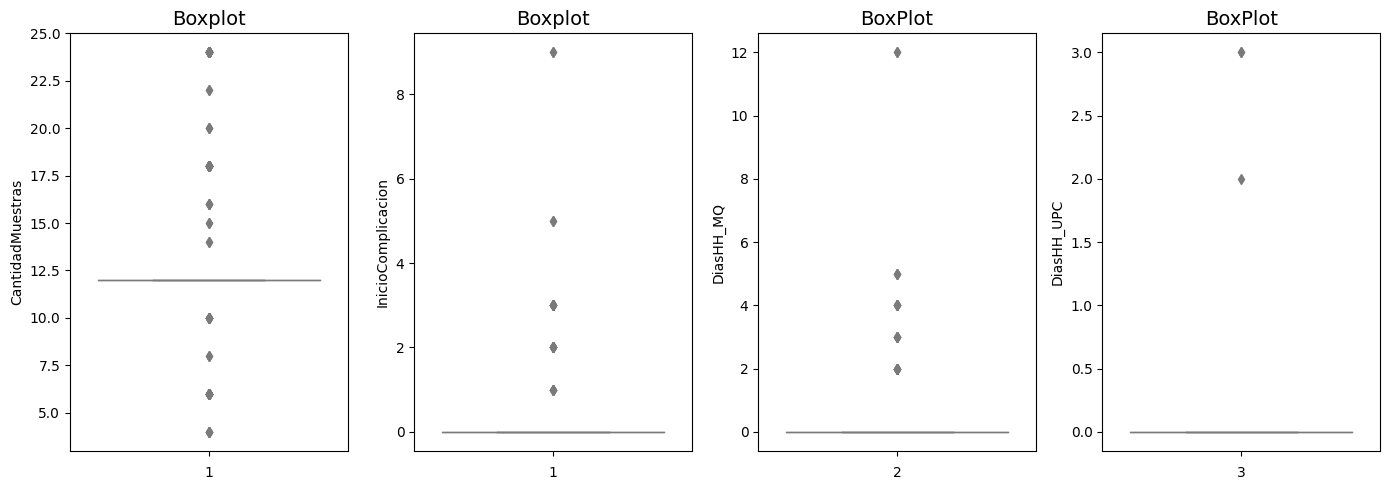

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14,5))

sns.boxplot(data=df2, y='CantidadMuestras', linewidth=1, palette='pastel', ax=axes[0])
axes[0].set_title('Boxplot', fontsize=14)
axes[0].set_xlabel('1', fontsize=10)
axes[0].set_ylabel('CantidadMuestras', fontsize=10)

sns.boxplot(data=df2, y='InicioComplicacion', linewidth=1, palette='pastel', ax=axes[1])
axes[1].set_title('Boxplot', fontsize=14)
axes[1].set_xlabel('1', fontsize=10)
axes[1].set_ylabel('InicioComplicacion', fontsize=10)

sns.boxplot(data=df2, y='DiasHH_MQ', linewidth=1, palette='pastel', ax=axes[2])
axes[2].set_title('BoxPlot', fontsize=14)
axes[2].set_xlabel('2', fontsize=10)
axes[2].set_ylabel('DiasHH_MQ', fontsize=10)

sns.boxplot(data=df2, y='DiasHH_UPC', linewidth=1, palette='pastel', ax=axes[3])
axes[3].set_title('BoxPlot', fontsize=14)
axes[3].set_xlabel('3', fontsize=10)
axes[3].set_ylabel('DiasHH_UPC', fontsize=10)

#ajustar espacio entre subplots
plt.tight_layout()

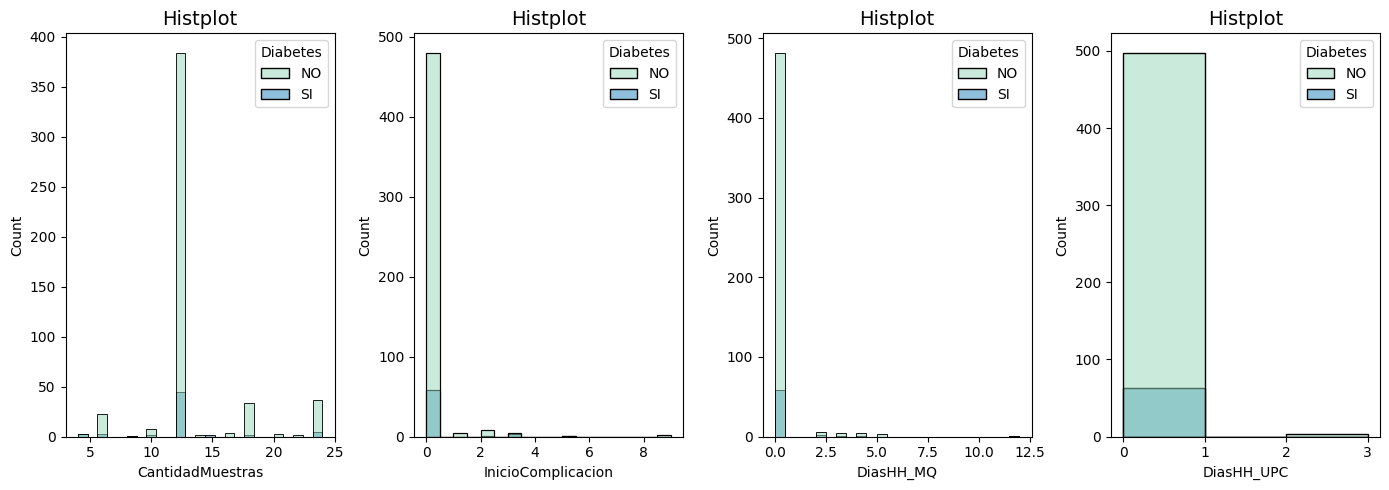

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(14,5))

sns.histplot(data=df2, x='CantidadMuestras', hue='Diabetes', bins=25, stat='count', palette='YlGnBu', ax=axes[0])
axes[0].set_title('Histplot', fontsize=14)

sns.histplot(data=df2, x='InicioComplicacion', hue='Diabetes', bins=18, stat='count', palette='YlGnBu', ax=axes[1])
axes[1].set_title('Histplot', fontsize=14)

sns.histplot(data=df2, x='DiasHH_MQ', hue='Diabetes', bins=24, stat='count', palette='YlGnBu', ax=axes[2])
axes[2].set_title('Histplot', fontsize=14)

sns.histplot(data=df2, x='DiasHH_UPC', hue='Diabetes', bins=3, stat='count', palette='YlGnBu', ax=axes[3])
axes[3].set_title('Histplot', fontsize=14)

#ajustar espacio entre subplots
plt.tight_layout()

In [ ]:
# validar cambios
df2.describe()

,Edad,PSA,CantidadMuestras,InicioComplicacion,DiasHH_MQ,DiasHH_UPC
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,63.588652,13.246170,12.989362,0.132979,0.166667,0.014184
std,7.868205,15.680914,3.923318,0.748031,0.961361,0.197167
min,39.000000,0.600000,4.000000,0.000000,0.000000,0.000000
25%,59.000000,5.600000,12.000000,0.000000,0.000000,0.000000
50%,64.000000,8.000000,12.000000,0.000000,0.000000,0.000000
75%,69.000000,15.000000,12.000000,0.000000,0.000000,0.000000
max,84.000000,100.000000,24.000000,9.000000,12.000000,3.000000


# EDA

In [ ]:
# identificar cuantos datos posibles puede tomar cada variable object 
{'Edad': df2.Edad.nunique(), 'Diabetes':	df2.Diabetes.nunique(), 'HHUltimoMes':	df2.HHUltimoMes.nunique(), 'CUP':	df2.CUP.nunique(), 'EnfermedadCPO':	df2.EnfermedadCPO.nunique(), 'VolumenProstatico': df2.VolumenProstatico.nunique(),	'PSA': df2.PSA.nunique(), 'BiopsiasPrevias': df2.BiopsiasPrevias.nunique(),	'AntibioticoProfilaxis': df2.AntibioticoProfilaxis.nunique(), 'CantidadMuestras': df2.CantidadMuestras.nunique(), 'Biopsia': df2.Biopsia.nunique(), 'InicioComplicacion': df2.InicioComplicacion.nunique(), 'Fiebre': df2.Fiebre.nunique(), 'ITU': df2.ITU.nunique(), 'TipoCultivo': df2.TipoCultivo.nunique(), 'AgenteAislado': df2.AgenteAislado.nunique(), 'PatronResistencia': df2.PatronResistencia.nunique(), 'Hospitalizacion': df2.Hospitalizacion.nunique(), 'DiasHH_MQ': df2.DiasHH_MQ.nunique(), 'DiasHH_UPC': df2.DiasHH_UPC.nunique()}

{'Edad': 43,
 'Diabetes': 2,
 'HHUltimoMes': 2,
 'CUP': 2,
 'EnfermedadCPO': 4,
 'VolumenProstatico': 2,
 'PSA': 145,
 'BiopsiasPrevias': 2,
 'AntibioticoProfilaxis': 5,
 'CantidadMuestras': 12,
 'Biopsia': 11,
 'InicioComplicacion': 6,
 'Fiebre': 2,
 'ITU': 2,
 'TipoCultivo': 4,
 'AgenteAislado': 4,
 'PatronResistencia': 5,
 'Hospitalizacion': 2,
 'DiasHH_MQ': 6,
 'DiasHH_UPC': 3}

In [ ]:
# conocer cada uno de los datos que puede tomar cada variable object
{'Edad': df2.Edad.unique(), 'Diabetes':	df2.Diabetes.unique(), 'HHUltimoMes':	df2.HHUltimoMes.unique(), 'CUP':	df2.CUP.unique(), 'EnfermedadCPO':	df2.EnfermedadCPO.unique(), 'VolumenProstatico': df2.VolumenProstatico.unique(),	'PSA': df2.PSA.unique(), 'BiopsiasPrevias': df2.BiopsiasPrevias.unique(),	'AntibioticoProfilaxis': df2.AntibioticoProfilaxis.unique(), 'CantidadMuestras': df2.CantidadMuestras.unique(), 'Biopsia': df2.Biopsia.unique(), 'InicioComplicacion': df2.InicioComplicacion.unique(), 'Fiebre': df2.Fiebre.unique(), 'ITU': df2.ITU.unique(), 'TipoCultivo': df2.TipoCultivo.unique(), 'AgenteAislado': df2.AgenteAislado.unique(), 'PatronResistencia': df2.PatronResistencia.unique(), 'Hospitalizacion': df2.Hospitalizacion.unique(), 'DiasHH_MQ': df2.DiasHH_MQ.unique(), 'DiasHH_UPC': df2.DiasHH_UPC.unique()}

{'Edad': array([53, 56, 57, 55, 67, 69, 44, 54, 68, 43, 65, 62, 71, 64, 77, 75, 73,
        63, 66, 84, 42, 61, 47, 48, 49, 81, 52, 74, 70, 58, 59, 60, 50, 76,
        78, 46, 51, 79, 39, 72, 80, 45, 82]),
 'Diabetes': array(['NO', 'SI'], dtype=object),
 'HHUltimoMes': array(['NO', 'SI'], dtype=object),
 'CUP': array(['NO', 'SI'], dtype=object),
 'EnfermedadCPO': array(['NO', 'SI, EPOC', 'SI, ASMA', 'SI'], dtype=object),
 'VolumenProstatico': array(['SI', 'NO'], dtype=object),
 'PSA': array([  4.  ,   7.7 ,  29.  ,   7.  ,   6.2 ,   6.  ,   2.5 ,   5.7 ,
          4.3 ,   5.19,   4.5 ,  14.  ,  10.  ,   9.  ,  25.  ,  91.8 ,
         21.  ,  98.  ,   7.5 ,  10.8 ,  10.5 ,  90.  ,   5.1 ,  16.  ,
         17.  ,  23.  ,   6.4 , 100.  ,   5.8 ,  38.9 ,  20.  ,  40.  ,
          9.5 ,   9.6 ,  10.2 ,   8.5 ,  53.  ,  19.  ,   5.6 ,   3.5 ,
         15.  ,   5.2 ,  17.7 ,   4.6 ,   8.  ,   8.7 ,   4.8 ,   7.6 ,
         10.6 ,   4.7 ,  18.  ,  27.  ,   5.  ,   8.39,   4.79,   6.8 ,
       

In [ ]:
df2.to_csv('BBDD_HospitalizaciónB.csv', index=False)